# Sitabja Ukil - 17200734

# COMP41680 -   Assignment 1: Data Collection & Preparation

## Import packages

In [1]:
import os
from urllib.request import urlopen
import csv
import pandas as pd 
import json

#import for the supporting apis for analysis
from itertools import chain
from ast import literal_eval
import numpy as np

#import for visualization api
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## Task 1: Identify one or more suitable web APIs

The API chosen for this assignment is https://www.themoviedb.org/documentation/api/discover. This is a very powerful API to get information about movies their ratings and reviews.

I am using an API to get information of the movies which are released after 1900. 
The Api key I have recieved is 3088d30de9df0e8832fd0436bdd62d98

In [2]:
api_key= "3088d30de9df0e8832fd0436bdd62d98"

In [3]:
base_link = "https://api.themoviedb.org/3"

In [4]:
movie_link = "/discover/movie?primary_release_date.gte=1900-09-15"

In [5]:
movie_genres_link = "/genre/movie/list?" 

The API has a pagination in the response and each page has around 20 movies. Here , I am taking first 20 pages

In [6]:
pages = range(1,41);

## Task 2: Collect data from your chosen API(s)

functions to get the data from the api

<font color='red' style="font-style:italic">get the data from the given api</font>

In [7]:
def get_data_from_api(link,api_key,page,isGenre):
    u = urlopen(link+"&api_key="+api_key+"&page="+str(page)); #open the url to read
    resp = json.loads(u.read().decode('utf-8')) #load json data from the api 
    response = []
    if (not isGenre): #check which ai is called
        response = resp['results'];
    else:
        response = resp['genres']
    return response

<font color='red' style="font-style:italic">In movie list genre filed has ids , this method is to chnage those ids to their appropriate name</font>

In [8]:
#merge the data from two apis, changes individual genre id to its name 
def change_genreId_name(movie_json,genre_json):
    for movie in movie_json:
        movie['genre'] = []
        movie['genre'] = [obj["name"] for obj in genre_json if obj["id"] in movie['genre_ids'] ]
    return movie_json

<font color='red' style="font-style:italic">get the filtereder data with respect to the given columns</font>

In [9]:
def get_filtered_data(response_json, columns):
    filtered_data = []
    for response in response_json:
        data = {}
        for key in response:
            if key in columns:
                data[key] = response[key];
        filtered_data.append(data);
    return filtered_data

<font color='red' style="font-style:italic">Write the filtered data to the csv</font>

In [10]:
def write_data_to_csv(file_loc,data_json):
    is_header = True;
    # open a file and write into it, newLine ='' is used to prevent the blanck line after each row
    with open(file_loc, "w", newline='') as f: 
        csvwriter = csv.writer(f)
        for data in data_json:
            if (is_header):
                #set the header of the csv
                header = data.keys();
                csvwriter.writerow(header);
                is_header = False
            try:
                csvwriter.writerow(data.values())
            except ValueError:
                # rows having onknown character ( not english) are excluded
                print('Unknown data found while writing the following row :')
                print(data.values())
    f.close();

## Task 3: Parse the collected data, and store it in an appropriate file format

<font color='red' style="font-style:italic">Writting raw data into the data file</font>

It uses the function defined in the previous steps to collect the raw data and filter it using some predefined filed and store it to an appropriate format. It excludes the rows having unknown characters, which

In [11]:
response_json_movie = []
for page in pages:
    response_json_movie.extend(get_data_from_api(base_link+movie_link,api_key,page, False))
    
response_json_genre = get_data_from_api(base_link+movie_genres_link,api_key,1,True)

# get the filtered data from the raw json
filtered_data = change_genreId_name(response_json_movie, response_json_genre)
#write the filtered data to csv file
write_data_to_csv('Movie_data.csv',filtered_data);

Unknown data found while writing the following row :
dict_values([0, 479363, False, 0, 'Kamen Rider Heisei Generations FINAL: Build & Ex-Aid with Legend Riders', 52.099561, '/cGhdduplj8YdAwg7iPCeGjO1YvZ.jpg', 'ja', '仮面ライダー平成ジェネレーションズFINAL ビルド＆エグゼイドwithレジェンドライダー', [28, 12, 878], '/aVnvDWF7dELkSzYJfzK9yrpvbv9.jpg', False, 'Kamen Riders Build and Ex-Aid team up with the legendary heroes of the Heisei Generation - OOO, Fourze, Gaim, and Ghost.', '2017-12-09', ['Action', 'Adventure', 'Science Fiction']])
Unknown data found while writing the following row :
dict_values([2, 458741, False, 8.5, 'Mayaanadhi', 37.560329, '/mNxAgWdHPWOAUVcI4kEuXvpo97j.jpg', 'ml', 'മായാനദി', [18, 10749], '/cWmknHr6VVNInXw6BmauPaldMnP.jpg', False, 'A shady money deal goes wrong and in the aftermath Mathan  ends up killing a police officer. Meanwhile in Kochi, his old flame Aparna  an aspiring actress is struggling to prop up her career. Mathan meets up with Aparna and tries to rekindle the past, even as the police 

## Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

In [12]:
dataset = pd.read_csv('Movie_data.csv',engine='python') # engine=python  is used because without this it was not able to read some characters of the file
dataset.tail(5)

,vote_count,id,video,vote_average,title,popularity,poster_path,original_language,original_title,genre_ids,backdrop_path,adult,overview,release_date,genre
783,2097,7446,False,6.5,Tropic Thunder,19.939552,/zoWUdaaWKPDyr9b0il0YcggDWgJ.jpg,en,Tropic Thunder,"[28, 35]",/6TdYGyANd7QhcV6gsx4meW8Y9Wf.jpg,False,"Vietnam veteran 'Four Leaf' Tayback's memoir, ...",2008-08-09,"['Action', 'Comedy']"
784,3311,854,False,6.7,The Mask,19.919275,/v8x8p441l1Bep8p82pAG6rduBoK.jpg,en,The Mask,"[10749, 35, 80, 14]",/kQlLZ8JgzVhFH6hlZovZycQSxbP.jpg,False,When timid bank clerk Stanley Ipkiss discovers...,1994-07-29,"['Comedy', 'Crime', 'Fantasy', 'Romance']"
785,2490,44896,False,6.6,Rango,19.908856,/afxRbCwwKjrWgGJtsVNs1BW1Dk5.jpg,en,Rango,"[16, 35, 10751, 37, 12]",/fX6o5DCdGVEEZ1OT1IourOUkQMb.jpg,False,"When Rango, a lost family pet, accidentally wi...",2011-03-02,"['Adventure', 'Animation', 'Comedy', 'Family',..."
786,2279,11224,False,6.8,Cinderella,19.893925,/cdf4J7tDhSPAghWWgx9EnwQWBfF.jpg,en,Cinderella,"[10751, 14, 16, 10749]",/xSN1cpugrzi8DjpVxtHeRRlbB6Q.jpg,False,Cinderella has faith her dreams of a better li...,1950-03-04,"['Animation', 'Family', 'Fantasy', 'Romance']"
787,1960,324849,False,7.2,The Lego Batman Movie,19.875023,/1pHOqpdCYNmtRVJs6pGKQKttrPm.jpg,en,The Lego Batman Movie,"[28, 16, 35, 10751, 14]",/gbO4tWvMC0oLbNvHP9Zth3eUeAA.jpg,False,In the irreverent spirit of fun that made “The...,2017-02-08,"['Action', 'Animation', 'Comedy', 'Family', 'F..."


<font color='red' style="font-style:italic">Drop Irrelevant columns</font>

In [13]:
#we already have genres by name we can drop genre_ids column
dataset = dataset.drop(['genre_ids'], axis=1)
#poster_path and basckdrop_path contain some image path, which are not relevant for this analysis, we can drop those two columns
dataset = dataset.drop(['poster_path','backdrop_path'], axis=1)
#overview contains description which is not useful for statistical analysis, dropping overview
dataset = dataset.drop(['overview'], axis=1)

In [14]:
dataset.head()

,vote_count,id,video,vote_average,title,popularity,original_language,original_title,adult,release_date,genre
0,1070,337167,False,6.2,Fifty Shades Freed,600.256939,en,Fifty Shades Freed,False,2018-02-07,"['Drama', 'Romance']"
1,6675,269149,False,7.7,Zootopia,417.963560,en,Zootopia,False,2016-02-11,"['Adventure', 'Animation', 'Comedy', 'Family']"
2,3439,284054,False,7.4,Black Panther,298.913231,en,Black Panther,False,2018-02-13,"['Action', 'Adventure', 'Fantasy', 'Science Fi..."
3,3328,354912,False,7.8,Coco,259.945509,en,Coco,False,2017-10-27,"['Adventure', 'Animation', 'Comedy', 'Family']"
4,506,338970,False,6.1,Tomb Raider,224.314953,en,Tomb Raider,False,2018-03-08,"['Action', 'Adventure']"


<font color='red' style="font-style:italic">Check for misisng data</font>

In [15]:
dataset.isnull().sum()

vote_count           0
id                   0
video                0
vote_average         0
title                0
popularity           0
original_language    0
original_title       0
adult                0
release_date         0
genre                0
dtype: int64

There is no null value present in the dataset 

<font color='red' style="font-style:italic">Check for distinct counts wrt some fields</font>

In [16]:
#check distinct values for 'video' with counts
dataset.groupby('video')['id'].nunique()

video
False    788
Name: id, dtype: int64

As we can see all the rows have same values for 'video', this column is not giving any relevant information, we can drop this column

In [17]:
dataset = dataset.drop(['video'],axis=1)

In [18]:
#check distinct values for 'original_language' with counts
dataset.groupby('original_language')['id'].nunique()

original_language
de      4
en    765
es      1
fr      3
it      7
ko      1
no      1
pt      1
ru      1
sv      1
ta      2
tl      1
Name: id, dtype: int64

Most of the movies are in 'en', lets check the proportion of english movies

In [19]:
len(dataset[dataset['original_language'] == 'en']) / len(dataset)

0.9708121827411168

As 97% movies in the dataset are of English language, we will restrict our analysis to only English movies. Thus, droping other movies 

In [20]:
dataset = dataset[dataset['original_language']  == 'en']

In [21]:
#check distinct values for adult columns with counts
dataset.groupby('adult')['id'].nunique()

adult
False    765
Name: id, dtype: int64

All rows have same value for 'adult', so we can drop it

In [22]:
dataset = dataset.drop(['adult'],axis=1)

'title' and 'original_title' look similar. Check percentage of dissimilarities between 'title' and 'original_title' 

In [23]:
disimilarities = []
for index, movie in dataset.iterrows():
    if movie['title'] != movie['original_title']:
        disimilarities.append((movie['title'], movie['original_title']))
#ratio of disimilarities between title and original_title
len(disimilarities)/len(dataset)

0.006535947712418301

As we can see in very small proprtion of data title and original title differ from each other. This is may be due to different language. However, as the percentage is only 2%, we can easily drop one column because both are highly correlated

In [24]:
dataset = dataset.drop(['original_title'],axis=1)

In [25]:
dataset.head()

,vote_count,id,vote_average,title,popularity,original_language,release_date,genre
0,1070,337167,6.2,Fifty Shades Freed,600.256939,en,2018-02-07,"['Drama', 'Romance']"
1,6675,269149,7.7,Zootopia,417.963560,en,2016-02-11,"['Adventure', 'Animation', 'Comedy', 'Family']"
2,3439,284054,7.4,Black Panther,298.913231,en,2018-02-13,"['Action', 'Adventure', 'Fantasy', 'Science Fi..."
3,3328,354912,7.8,Coco,259.945509,en,2017-10-27,"['Adventure', 'Animation', 'Comedy', 'Family']"
4,506,338970,6.1,Tomb Raider,224.314953,en,2018-03-08,"['Action', 'Adventure']"


Round off popularity to 2 decimal place

In [26]:
dataset['popularity'] = round(dataset['popularity'],2)

change release date column to release year. All our analysis will be based on the year. In this analysis particular date in irrelevant. Thus extracting year ofrom dates :

In [27]:
dataset['release_year'] = pd.to_datetime(dataset['release_date']).dt.year #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

drop release_date

In [28]:
dataset = dataset.drop(['release_date'],axis=1)

As 2018 is not yet completed, we are going to take data till 2017

In [29]:
rows_drop = dataset[dataset['release_year'] > 2017]
dataset = dataset.drop(rows_drop.index, axis=0)

<font color='red' style="font-style:italic">Final cleaned dataset for analysis</font>

In [30]:
dataset.head()

,vote_count,id,vote_average,title,popularity,original_language,genre,release_year
1,6675,269149,7.7,Zootopia,417.96,en,"['Adventure', 'Animation', 'Comedy', 'Family']",2016
3,3328,354912,7.8,Coco,259.95,en,"['Adventure', 'Animation', 'Comedy', 'Family']",2017
6,4504,181808,7.2,Star Wars: The Last Jedi,194.03,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2017
7,5140,284053,7.4,Thor: Ragnarok,189.63,en,"['Action', 'Adventure', 'Fantasy']",2017
8,2852,399055,7.3,The Shape of Water,173.96,en,"['Drama', 'Fantasy', 'Romance']",2017


## Task 5: Analyse and summarise the cleaned dataset


<font color='red' style="font-style:italic">Number of movies released year wise</font>

Lets see how the number of movies released has changed over the years.

In [31]:
# group by the data by release year and get the count of ids
movie_per_year = dataset.groupby(['release_year'])["id"].count()
movie_per_year.tail(5)

release_year
2013    43
2014    47
2015    44
2016    28
2017    77
Name: id, dtype: int64

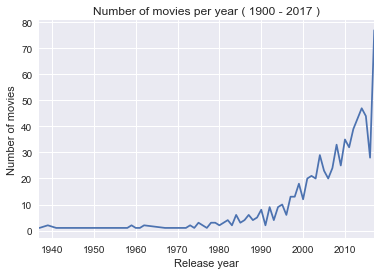

In [32]:
#plot the movie_per_year
plt.figure()
movie_per_year.plot()
plt.title('Number of movies per year ( 1900 - 2017 )')
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.show()

lets see genre wise how the plot look like.

get the count of movies groupby genre and release_year

In [33]:
#https://stackoverflow.com/questions/49220479/how-to-group-by-according-to-the-values-of-a-list-present-in-a-column-in-datafra?noredirect=1#comment85463311_49220479
#https://stackoverflow.com/questions/23119472/in-pandas-python-reading-array-stored-as-string
#as genre is a list of string wee need to flatten the list and then use group by. 
df = pd.DataFrame({
      'genre' : list(
           chain.from_iterable(dataset['genre'].apply(literal_eval).tolist())
       ), 
       'release_year' : dataset.release_year.repeat(dataset['genre'].apply(literal_eval).str.len())
})
movie_group = df.groupby(
     ['release_year','genre'], sort=True 
 ).size().reset_index(name='number_of_movies')
#display movie_group
movie_group.tail(10)

,release_year,genre,number_of_movies
532,2017,Fantasy,11
533,2017,History,5
534,2017,Horror,12
535,2017,Music,3
536,2017,Mystery,11
537,2017,Romance,5
538,2017,Science Fiction,20
539,2017,Thriller,27
540,2017,War,3
541,2017,Western,1


<font color='red' style="font-style:italic">Number of movies per genre from </font>

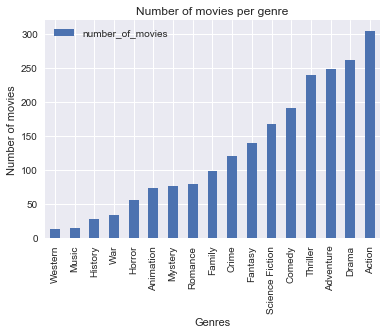

In [34]:
#group by genres
group_by_genres = movie_group.groupby(['genre'],as_index=False).sum().sort_values(by=['number_of_movies'])
#plot group_by_genres
group_by_genres.plot(x='genre',y='number_of_movies',kind='bar')
plt.title('Number of movies per genre')
plt.ylabel('Number of movies')
plt.xlabel('Genres')
plt.show()

We will continuw our analysis with the top five genres

In [35]:
top_genres = ['Action', 'Drama', 'Adventure', 'Thriller', 'Comedy'] 

<font color='red' style="font-style:italic">proportion of movies of top 5 genres in last 10 years</font>

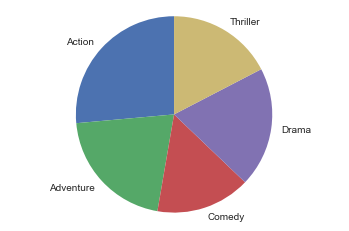

In [36]:
#get the movies of top 5 genres in last 10 years 
recent_movie_groups = movie_group[(movie_group['release_year'] > 2007) & (movie_group['genre'].isin(top_genres))]
# get the recent movies of top five genres group by genres
recent_movie_groups_groupby_genres = recent_movie_groups.groupby(['genre'])['number_of_movies'].sum().reset_index()
# plot pie chart
plt.pie(recent_movie_groups_groupby_genres['number_of_movies'], labels=recent_movie_groups_groupby_genres['genre'],startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()


<font color='red' style="font-style:italic">Number of movies per genre per year in last 10 years</font>

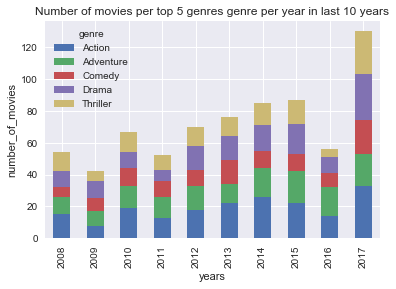

In [37]:
recent_movie_groups.pivot_table(index='release_year', columns='genre', values='number_of_movies', 
                                aggfunc='sum', fill_value=0).plot.bar(stacked=True)
plt.title('Number of movies per top 5 genres genre per year in last 10 years')
plt.xlabel('years')
plt.ylabel('number_of_movies')
plt.show()

<font color='red' style="font-style:italic">Top 5 trending movies as of the day, the data is collected </font>

According to TMDB the popularity mesures depends upon <br>
<ul>
    
        <li>Number of votes for the day </li>
        <li>Number of views for the day </li>
        <li>Number of users who marked it as a "favourite" for the day </li>
        <li>Number of users who added it to their "watchlist" for the day </li>
        <li>Release date </li>
        <li>Number of total votes </li>
        <li>Previous days score </li>
    
</ul>

In [38]:
dataset.sort_values(by='popularity',ascending = False).head(5)

,vote_count,id,vote_average,title,popularity,original_language,genre,release_year
1,6675,269149,7.7,Zootopia,417.96,en,"['Adventure', 'Animation', 'Comedy', 'Family']",2016
3,3328,354912,7.8,Coco,259.95,en,"['Adventure', 'Animation', 'Comedy', 'Family']",2017
6,4504,181808,7.2,Star Wars: The Last Jedi,194.03,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2017
7,5140,284053,7.4,Thor: Ragnarok,189.63,en,"['Action', 'Adventure', 'Fantasy']",2017
8,2852,399055,7.3,The Shape of Water,173.96,en,"['Drama', 'Fantasy', 'Romance']",2017


<font color='red' style="font-style:italic">Top 10 movies according to the rating (avg vote)</font>

we will consider movies with number of vote counts  more than 1000 

In [39]:
dataset[dataset['vote_count'] > 1000].sort_values(by='vote_average',ascending=False ).head(10)

,vote_count,id,vote_average,title,popularity,original_language,genre,release_year
81,7331,238,8.5,The Godfather,45.14,en,"['Crime', 'Drama']",1972
274,9773,278,8.5,The Shawshank Redemption,29.57,en,"['Crime', 'Drama']",1994
484,5489,424,8.4,Schindler's List,24.61,en,"['Drama', 'History', 'War']",1993
151,4249,240,8.4,The Godfather: Part II,36.09,en,"['Crime', 'Drama']",1974
614,1491,311,8.3,Once Upon a Time in America,22.11,en,"['Crime', 'Drama']",1984
365,3161,539,8.3,Psycho,27.10,en,"['Drama', 'Horror', 'Thriller']",1960
426,2579,389,8.3,12 Angry Men,25.84,en,['Drama'],1957
124,11878,550,8.3,Fight Club,38.64,en,['Drama'],1999
281,3803,510,8.3,One Flew Over the Cuckoo's Nest,29.42,en,['Drama'],1975
200,5544,244786,8.3,Whiplash,32.78,en,['Drama'],2014


<font color='red' style="font-style:italic">average voting per genre per year</font>

lets see how the rating changes with the years for perticular genres

In [40]:
#https://stackoverflow.com/questions/49220479/how-to-group-by-according-to-the-values-of-a-list-present-in-a-column-in-datafra?noredirect=1#comment85463311_49220479
#https://stackoverflow.com/questions/23119472/in-pandas-python-reading-array-stored-as-string
df = pd.DataFrame({
      'genre' : list(
           chain.from_iterable(dataset['genre'].apply(literal_eval).tolist())
       ), 
       'vote_average' : dataset.vote_average.repeat(dataset['genre'].apply(literal_eval).str.len()),
       'release_year' : dataset.release_year.repeat(dataset['genre'].apply(literal_eval).str.len())
})
movie_group_vote_average = df.groupby(
     ['release_year','genre'], sort=True 
 )['vote_average'].mean().reset_index()



lets see average voting of the genres for all the years (1900 - 2017)

In [41]:
movie_group_vote_average_groupby_genres = movie_group_vote_average.groupby(['genre'])['vote_average'].mean().reset_index()
movie_group_vote_average_groupby_genres.sort_values(['vote_average'])

,genre,vote_average
16,Western,6.800000
0,Action,6.824821
7,Fantasy,6.832957
9,Horror,6.874198
3,Comedy,6.934536
13,Science Fiction,6.958622
1,Adventure,7.014152
14,Thriller,7.129115
12,Romance,7.159020
2,Animation,7.163833


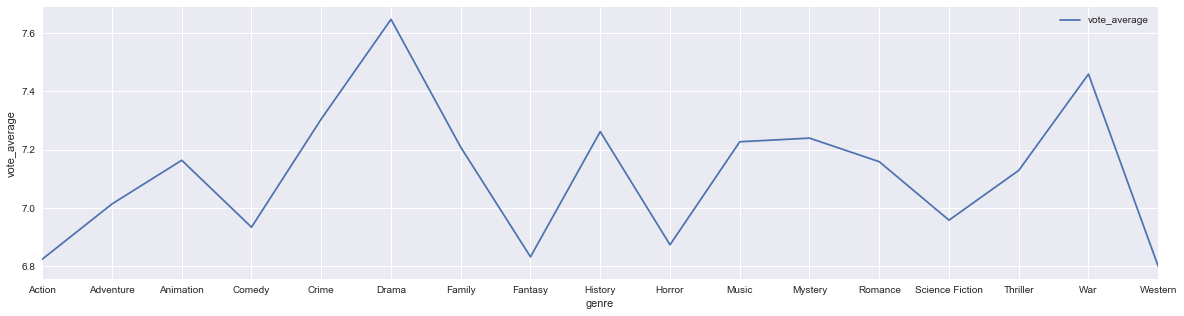

In [42]:
#plot the graph
genres = movie_group_vote_average_groupby_genres['genre'].tolist()
movie_group_vote_average_groupby_genres.plot(x='genre',figsize =(20,5))
plt.xticks(np.arange(len(genres)), genres) #np.arrange is used to show all the ticks with uniform space in between
plt.ylabel('vote_average')
plt.show()

From the table above, average rating of the drama is the highest. Crime movies are also very popular. Action movie ratings are the very low.

Plot the line graph to see the trend of average voting of individual genres (top five according to the number of movies released) year wise

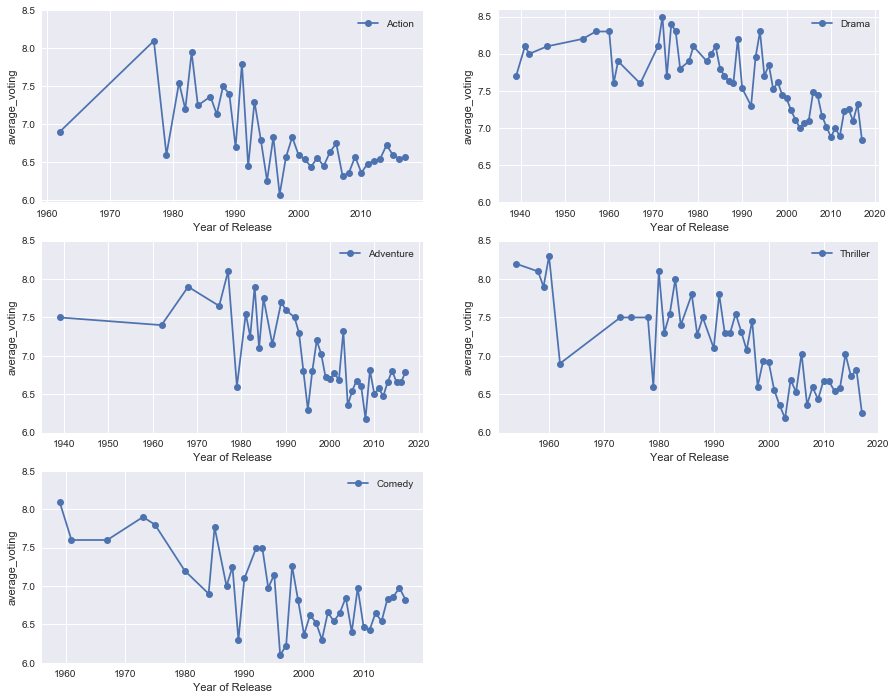

In [43]:
x = [] #temporary list is taken to show the individual graph
fig = plt.figure(figsize=(15,12))
i = 1 # counter
for genre in top_genres:
    x = movie_group_vote_average[movie_group_vote_average['genre']==genre]
    fig.add_subplot(3, 2, i)
    plt.xlabel('Year of Release')
    plt.ylabel('average_voting')
    plt.plot(x['release_year'].tolist(),x['vote_average'].tolist(),'o-',label=genre)
    plt.yticks(np.arange(6.0,9.0,0.5))
    plt.legend()
    i +=1

This illustration also shows vote_average of drama in consistently higher than other genres. However the average voting for individual genres decreases with the years. As the number of movie released is increasing, the average quality of the movie decreasing. Thus the average voting is showing a decreasing trend.

plot a heat map to see the overall comparison among the top five genres in last 10 years

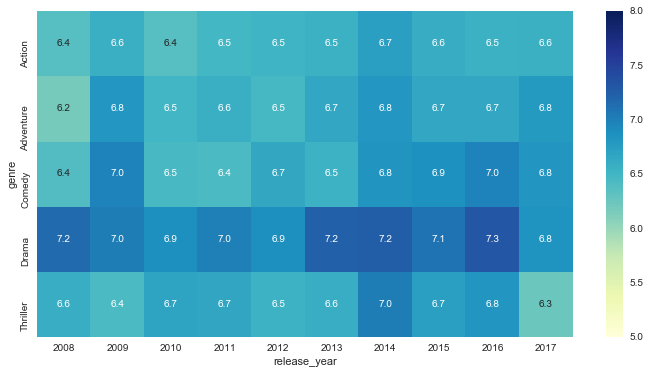

In [44]:
#filter data for last 10 years top genres
movie_group_filtered = movie_group_vote_average[(movie_group_vote_average['release_year'] > 2007 ) & (movie_group_vote_average['genre'].isin(top_genres))]
df_heat = movie_group_filtered.pivot_table(index='genre', columns='release_year', values='vote_average', aggfunc=np.mean)
plt.figure(figsize = (12,6))
sns.heatmap(df_heat, annot=True, fmt=".1f", cmap="YlGnBu", center=6.5, vmax=8, vmin=6)
plt.show()

From the heat map, we can see drama has almost consistent dark color. On the other hand action is on the lighter side. Thus, this is also supporting our hypothesis made in the previous illustration

<font color='red' style="font-style:italic">number of votes per genre per year</font>

Now lets see how the number of votes changes over the years

In [45]:
# flatten the genres list
df = pd.DataFrame({
      'genre' : list(
           chain.from_iterable(dataset['genre'].apply(literal_eval).tolist())
       ), 
       'vote_count' : dataset.vote_count.repeat(dataset['genre'].apply(literal_eval).str.len()),
       'release_year' : dataset.release_year.repeat(dataset['genre'].apply(literal_eval).str.len())
})
#group by the movies according to the genre
movie_group_vote_count = df.groupby(
     ['release_year','genre'], sort=True 
 )['vote_count'].sum().reset_index()
#display movie_group
movie_group_vote_count.head(10)

,release_year,genre,vote_count
0,1937,Animation,2586
1,1937,Family,2586
2,1937,Fantasy,2586
3,1939,Adventure,2074
4,1939,Drama,1246
5,1939,Family,2074
6,1939,Fantasy,2074
7,1939,Romance,1246
8,1939,War,1246
9,1941,Drama,1579


Plot line graphs to see the trend of the count of vote for individual genres

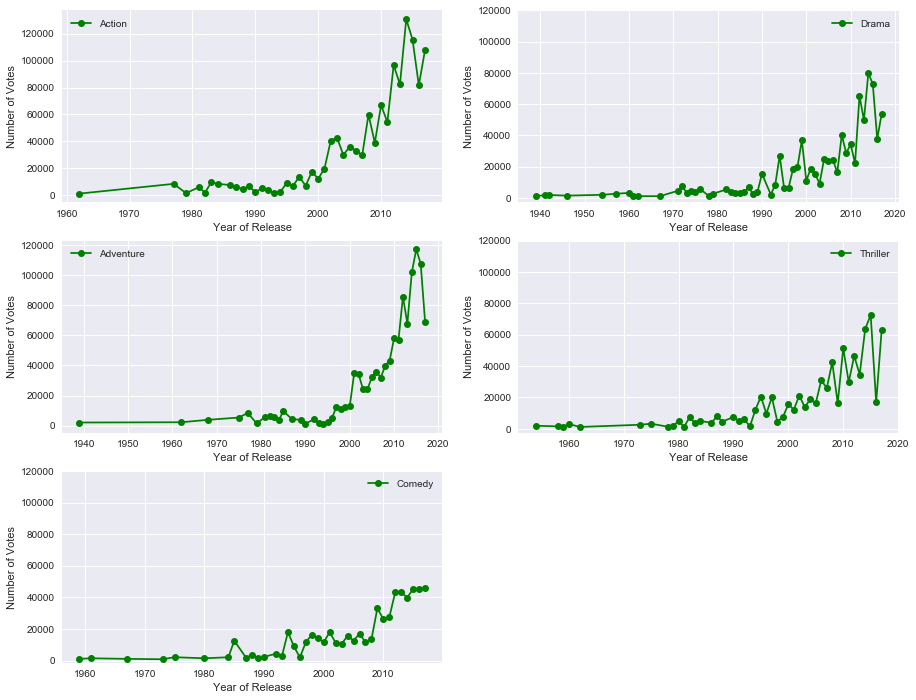

In [46]:
x = [] #temporaray list to plot the graphs
fig = plt.figure(figsize=(15,12))
i = 1
for genre in top_genres:
    x = movie_group_vote_count[movie_group_vote_count['genre']==genre]
    fig.add_subplot(3, 2, i)
    plt.xlabel('Year of Release')
    plt.ylabel('Number of Votes')
    plt.plot(x['release_year'].tolist(),x['vote_count'].tolist(),'go-',label=genre)
    plt.yticks(range(0,130000,20000))
    plt.legend()
    i +=1

As with the years number of movie release is increasing, number of vote count has also increased. Action movies hasve the highest number of vote and comedy has the lowest number of votes

plot a heat map to make a coparison of vote count among top genres in last 10 years

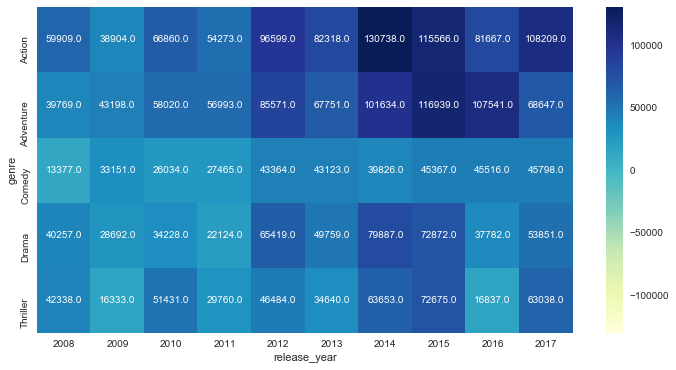

In [47]:
#filter data for last 10 years top genres
movie_group_filtered = movie_group_vote_count[(movie_group_vote_count['release_year'] > 2007 ) & (movie_group_vote_count['genre'].isin(top_genres))]
df_heat = movie_group_filtered.pivot_table(index='genre', columns='release_year', values='vote_count', aggfunc=np.mean)
plt.figure(figsize = (12,6))
sns.heatmap(df_heat, annot=True, fmt=".1f", cmap="YlGnBu", center=6.5)
plt.show()

Action has dark cells representing higher value, whereas comedy has lighter cells representing lower values

## Final Conclusion

From the analysis we can draw the conclusion as follows:<br/>
<ul>
    <li> The number of movies released per year has an increasing trend. </li>
    <li> The movies of genres drama, crime are highly rated over the years. </li>
    <li> As the number of movies increases, the number of votes for each genres also increase</li>
    <li> The quality of the movie decreases with the years (as the average vote is decreasing for each individual genres) </li>
</ul>

so, lets verify our last two hypothesis with the correlation matrices. 

<font color='red' style="font-style:italic">correlation between number of movies and vote count and average_vote</font>

In [48]:
#number of movies and average vote count per year for top 5 genres
vote_count_per_year = dataset.groupby(['release_year'])['vote_count'].sum()
average_rating_per_year =  dataset.groupby(['release_year'])['vote_average'].mean()
number_of_movies_per_year = dataset.groupby(['release_year'])['id'].count()

#concat the e counts to form the dataframe
d = pd.concat([ number_of_movies_per_year.to_frame(),vote_count_per_year.to_frame(),average_rating_per_year.to_frame()], axis=1)
d.columns = ['number_of_movies', 'vote_count', 'average ratings']

#correlation among the columns
corr = d.corr()
corr

,number_of_movies,vote_count,average ratings
number_of_movies,1.000000,0.95495,-0.727162
vote_count,0.954950,1.00000,-0.696650
average ratings,-0.727162,-0.69665,1.000000


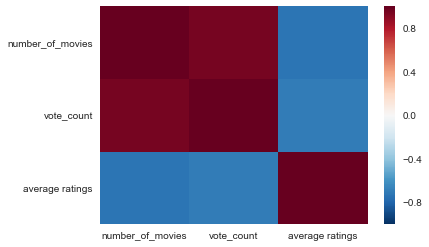

In [49]:
#Plot the correlation
sns.heatmap(corr)

From the above correlation plot it is clear that number of movies and vote count is highly correlated and voting average and number of movies are negatively correlated. Thus with the increase of number of movies the average quality of movies is decreasing.

Further statistical analysis can be done to find the relationship among the genres (eg. which set of genres are most likely to succeed as a group). However, drama and crime together most likely to be the best rated genres.

Not much analysis is done for the column 'popularity'. Further analysis can be carried out for that column to show the trend of 'popularity' based on the number of search , downloads.